In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
def read_3_weights(csv_file, ensemble='average'):
    weights = []
    names = None
    for skiprow in range(0, 9, 3):
        a = pd.read_csv(csv_file, sep='\t', skiprows=skiprow, nrows=2)
        if names is None:
            names = list(a.columns)
        weights.append(np.array(a.iloc[0]))        
    weights = np.array(weights)
    if ensemble == 'average':
        return names, weights.mean(0)


In [8]:
def plot_bars(weights, names, weights2, fig, ax, show_x, text_y=1.3, max_y=1.5):
    c_pos = 'orange'
    c_neg = 'darkslateblue'
    linewidth = 0.5
    barwidth = 0.9
    # plt.rcParams['svg.fonttype'] = 'none'
    # fig, ax = plt.subplots(figsize=(9, 3), dpi=100)
    p1 = ax.bar(names, np.abs(weights), barwidth, linewidth=linewidth, edgecolor='black')
    pos_ever = False
    neg_ever = False
    for i, bar in enumerate(p1):
        if weights[i] < 0:
            bar.set_color(c_neg)
            bar.set_edgecolor('black')
            if not neg_ever:
                bar.set_label("Absolute Negative")
                neg_ever = True
        elif weights[i] > 0:
            bar.set_color(c_pos)
            bar.set_edgecolor('black')
            if not pos_ever:
                bar.set_label("Positive")
                pos_ever = True
    p2 = ax.bar(names, -np.abs(weights2), barwidth, linewidth=linewidth, edgecolor='black')
    for i, bar in enumerate(p2):
        if weights2[i] < 0:
            bar.set_color(c_neg)
            bar.set_edgecolor('black')
        elif weights2[i] > 0:
            bar.set_color(c_pos)
            bar.set_edgecolor('black')
    # for i, allele in enumerate(alleles):
    #     ax.text(i-0.2, 40000, str(gains[i]), rotation=90, va='center')
    #     ax.text(i-0.2, 20000, str(shares[i]), rotation=90, va='center')
    #     ax.text(i - 0.2, -3000, str(abs(losses[i])), rotation=90, va='center')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.set_ylabel("Percolator Weights", fontsize=15)
    ax.tick_params(axis='x', labelsize=8, rotation=90)
    ax.set_ylim([-max_y, max_y])
    ax.spines['left'].set_bounds(-max_y, max_y)

    ticks =  ax.get_yticks()
    # set labels to absolute values and with integer representation
    ax.set_yticklabels([abs(tick) for tick in ticks])
    ax.text(-0.5, text_y, f"No Fine-tuned", fontsize=12)
    ax.text(-0.5, -text_y, f"Fine-tuned", fontsize=12)
    ax.axhline(0, color='black', linewidth=0.8, linestyle='--', xmin=0, xmax=0.955)
    if not show_x:
        ax.axes.get_xaxis().set_visible(False)
    return fig, ax

/tmp/ipykernel_60776/3646905696.py:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([abs(tick) for tick in ticks])
/tmp/ipykernel_60776/3646905696.py:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([abs(tick) for tick in ticks])
/tmp/ipykernel_60776/3646905696.py:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([abs(tick) for tick in ticks])
/tmp/ipykernel_60776/3646905696.py:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([abs(tick) for tick in ticks])


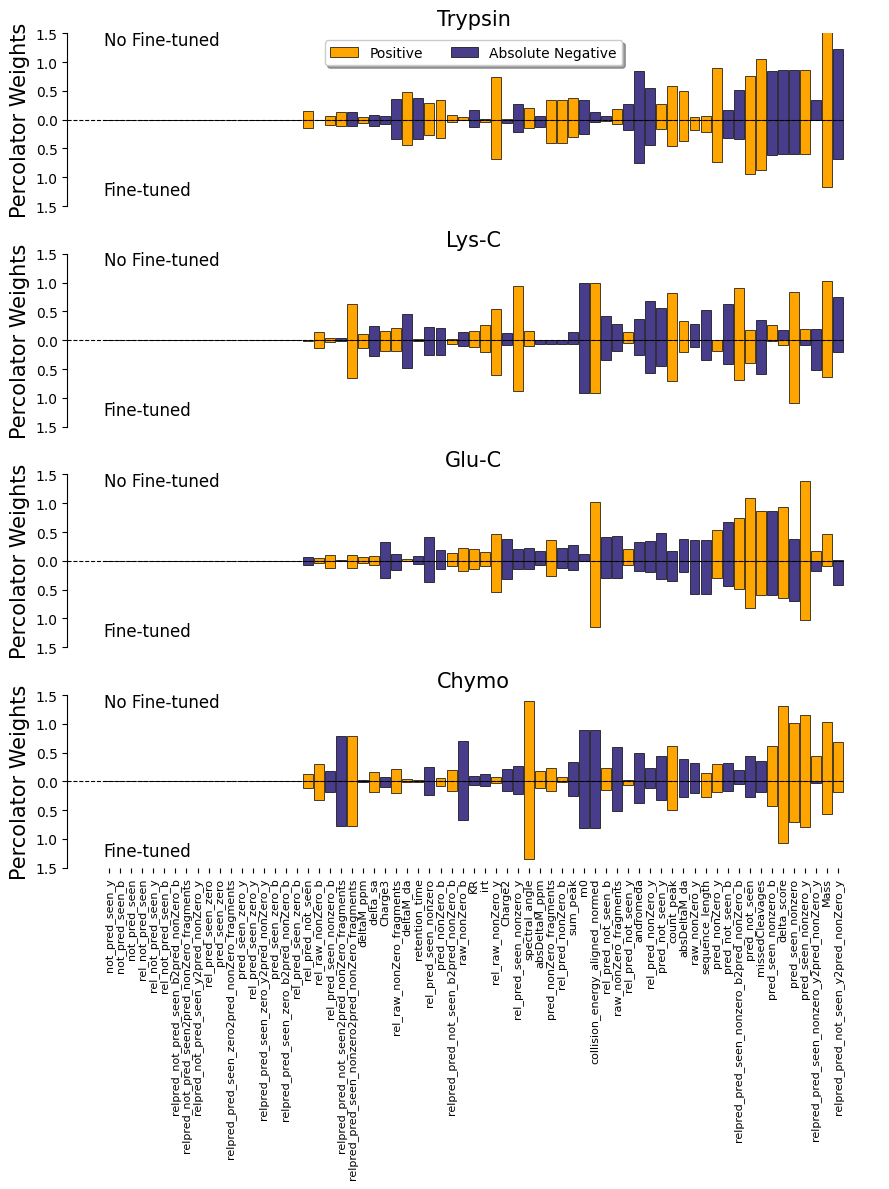

In [13]:
frag_model = 'prosit_l1'
feat_name = "prosit_best"
whichs = ['trypsin', "lysc",'gluc', "chymo"]
fig, axes = plt.subplots(4, figsize=(9, 12), dpi=100)
for i, (which, show) in enumerate(zip(whichs, ["Trypsin", "Lys-C", "Glu-C", "Chymo"])):
    result_dir = f"/data2/yejb/prosit/figs/fig235/{which}/percolator_up/try/{frag_model}"
    csv_dir = os.path.join(result_dir, "no_finetuned_3fold")
    csv_name = os.path.join(csv_dir, f"{feat_name}_weights.csv")
    feat_names, weights = read_3_weights(csv_name)

    csv_dir = os.path.join(result_dir, "finetuned_3fold_0.1")
    csv_name = os.path.join(csv_dir, f"{feat_name}_weights.csv")
    feat_names_ft, weights_ft = read_3_weights(csv_name)
    
    sorted_index = np.argsort(np.abs(weights_ft - weights))
    feat_names = [feat_names[i] for i in sorted_index]
    weights = weights[sorted_index]
    weights_ft = weights_ft[sorted_index]
    # assert feat_names == feat_names_ft
    _, ax = plot_bars(weights, feat_names, weights_ft, fig, axes[i], show_x=(i == len(whichs)-1))
    ax.set_title(show, fontsize=15)
    if i == 0:
        ax.legend(loc='upper center',
            fancybox=True, shadow=True, ncol=5)
fig.tight_layout()
fig.savefig(f"figs/supp11-{frag_model}-{feat_name}-bekker.svg",
                dpi=300, bbox_inches="tight")

/tmp/ipykernel_60776/3646905696.py:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([abs(tick) for tick in ticks])
/tmp/ipykernel_60776/3646905696.py:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([abs(tick) for tick in ticks])
/tmp/ipykernel_60776/3646905696.py:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([abs(tick) for tick in ticks])
/tmp/ipykernel_60776/3646905696.py:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([abs(tick) for tick in ticks])


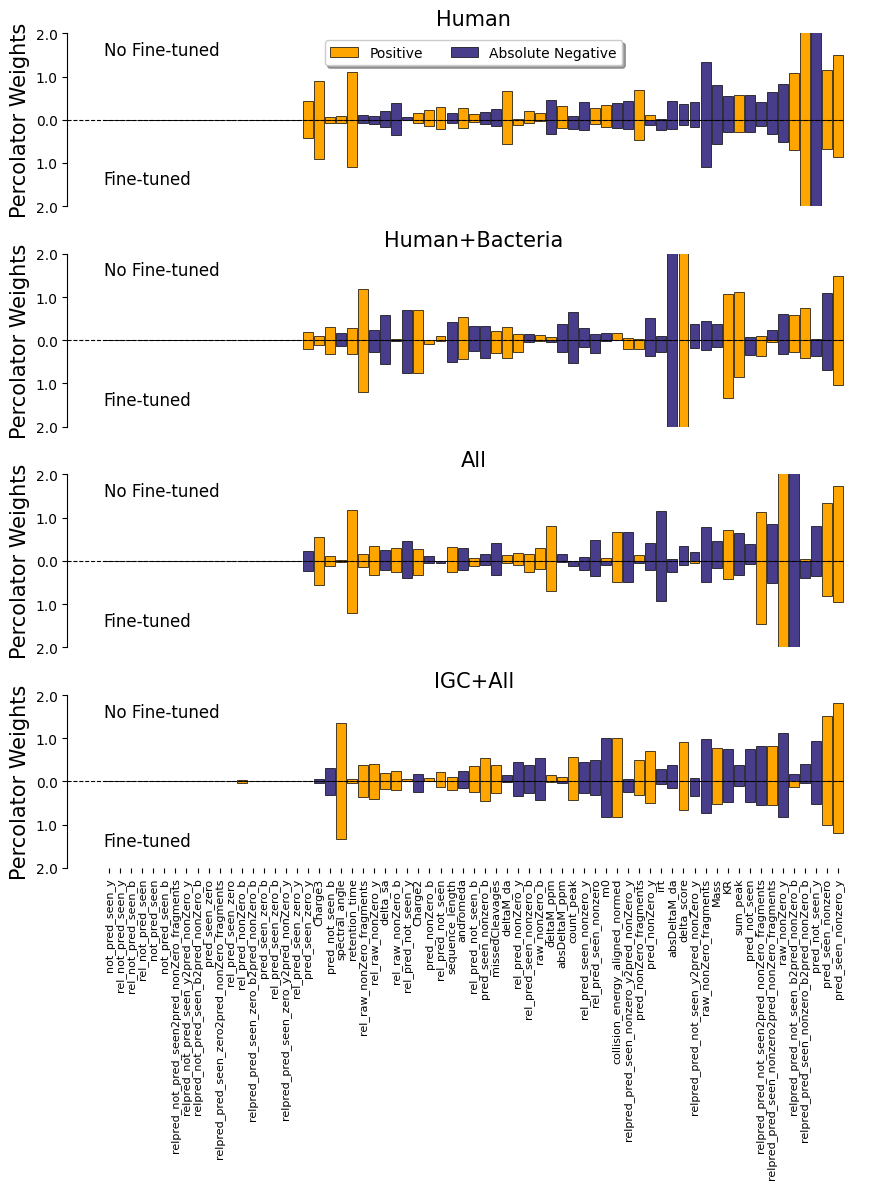

In [17]:
frag_model = 'prosit_l1'
feat_name = "prosit_best"
whichs = ["sprot_human", 'sprot_bacteria_human', 'sprot_all', 'IGC', ]
fig, axes = plt.subplots(4, figsize=(9, 12), dpi=100)
for i, (which, show) in enumerate(zip(whichs, ["Human", 'Human+Bacteria', 'All', 'IGC+All'])):
    result_dir = f"/data2/yejb/prosit/figs/figure6/{which}/percolator/try/{frag_model}"
    csv_dir = os.path.join(result_dir, "no_finetuned_3fold")
    csv_name = os.path.join(csv_dir, f"{feat_name}_weights.csv")
    feat_names, weights = read_3_weights(csv_name)

    csv_dir = os.path.join(result_dir, "finetuned_3fold")
    csv_name = os.path.join(csv_dir, f"{feat_name}_weights.csv")
    feat_names_ft, weights_ft = read_3_weights(csv_name)
    sorted_index = np.argsort(np.abs(weights_ft - weights))
    feat_names = [feat_names[i] for i in sorted_index]
    weights = weights[sorted_index]
    weights_ft = weights_ft[sorted_index]
    _, ax = plot_bars(weights, feat_names, weights_ft, fig, axes[i], show_x=(i == len(whichs)-1), text_y=1.5, max_y=2)
    ax.set_title(show, fontsize=15)
    if i == 0:
        ax.legend(loc='upper center',
            fancybox=True, shadow=True, ncol=5)
fig.tight_layout()
fig.savefig(f"figs/supp11-{frag_model}-{feat_name}-human.svg",
                dpi=300, bbox_inches="tight")